# Рынок заведений общественного питания Москвы.

Цель исследования: анализ рынка общественных заведений Москвы, для выяснения рентабельности кафе.
Планируется открыть небольшое кафе в Москве, оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Инвесторов интересует положение дел на рынке — сможет ли кафе снискать популярность на долгое время. Исследуем рынок. Мы имеем открытые данные о заведениях общественного питания в Москве.

https://docs.google.com/spreadsheets/d/1o2m2rqv8oZ83oPzaIUupP2Vvl0GNmOF9PAKC9EreCXw/edit?usp=sharing

### Данные таблицы

Таблица rest:

object_name — название объекта общественного питания;
chain — сетевой ресторан;
object_type — тип объекта общественного питания;
address — адрес;
number — количество посадочных мест.

## Шаг. Обработка данных

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from plotly import graph_objects as go
import plotly.express as px

In [84]:
rest = pd.read_csv('/datasets/rest_data.csv')

In [85]:
rest

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [86]:
rest['object_name'] = rest['object_name'].str.lower()

In [87]:
rest['object_type'] = rest['object_type'].str.lower()

In [88]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [89]:
rest.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Пропусков нет в таблице

In [90]:
rest.duplicated().sum() #смотрим количество дубликатов

0

In [91]:
print('Дубликатов строк в датасете: {}'.format(rest.duplicated().sum()))
print('Дубликатов id объектов: {}\n'.format(len(rest)-len(rest['id'].value_counts())))

Дубликатов строк в датасете: 0
Дубликатов id объектов: 0



Дубликатов в таблице нет

In [92]:
rest.object_type.unique() # смотрим уникальные значения, неявных дубликатов нет

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [93]:
rest.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number']).sum()

85

Найдено 85 дубликатов, такое количество невлияет на иследование, можно оставить без изменений

## Шаг. Анализ данных.

Соотношение видов объектов общественного питания по количеству.

In [94]:
type_counts = rest.groupby('object_type').agg({'id':'count','number':'mean'}).reset_index().rename(columns={'id':'counts'})
total_rests = type_counts.counts.sum()
type_counts['ratio'] = type_counts['counts'] / total_rests
type_counts

,object_type,counts,number,ratio
0,бар,856,43.494159,0.055707
1,буфет,585,51.129915,0.038071
2,закусочная,360,7.608333,0.023428
3,кафе,6099,39.716019,0.396915
4,кафетерий,398,9.123116,0.025901
5,магазин (отдел кулинарии),273,5.589744,0.017766
6,предприятие быстрого обслуживания,1923,20.552262,0.125146
7,ресторан,2285,96.834136,0.148705
8,столовая,2587,130.246618,0.168359


In [95]:
fig = go.Figure(go.Pie(labels=type_counts.object_type, values=type_counts.counts))
fig.show() 

Cоотношение сетевых и несетевых заведений по количеству

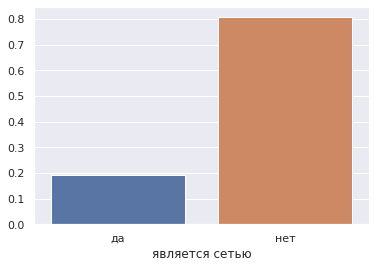

In [96]:
sns.set()
chains = rest.groupby('chain')['id'].count().reset_index().rename(columns={'id':'counts'})
chains['ratio'] = chains['counts'] / chains['counts'].sum()
sns.barplot(x='chain',y='ratio', data=chains)
plt.xlabel('является сетью')
plt.ylabel('')
plt.show()

**Из визуализации понятно, что 20% общественных заведений являются сетевыми и 80% не сетевыми заведениями.**

Выясним для какого вида объекта общественного питания характерно сетевое распространение.

In [97]:
object_chain = (rest
                .groupby(['object_type','chain'])['id'].count()
                .reset_index()
                .rename(columns={'id':'counts'})
                .merge(rest.groupby('object_type').chain.count(), on='object_type',suffixes=('','_total'))
               )

In [98]:
object_chain['ratio_percent'] = round((object_chain.counts / object_chain.chain_total) * 100)
object_chain

,object_type,chain,counts,chain_total,ratio_percent
0,бар,да,37,856,4.0
1,бар,нет,819,856,96.0
2,буфет,да,11,585,2.0
3,буфет,нет,574,585,98.0
4,закусочная,да,56,360,16.0
5,закусочная,нет,304,360,84.0
6,кафе,да,1396,6099,23.0
7,кафе,нет,4703,6099,77.0
8,кафетерий,да,52,398,13.0
9,кафетерий,нет,346,398,87.0


In [99]:
fig = px.bar(object_chain, x='object_type', y='counts', color='chain')
fig.update_xaxes(tickangle=45)
fig.show()

Сетевое распределение характерно для кафе,ресторанов, предприятий общественного питания, и отделов кулинарии в магазинах.

Выясним, что характорно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

In [100]:
seats = rest.groupby('object_type').agg({'number':'mean','id':'count'}).reset_index().rename(columns={'id':'counts'})
seats['ratio'] = seats.number / seats.counts # медианное число посад.мест в расчете на одно заведение
seats = seats.sort_values(by='ratio', ascending=False)
fig = px.bar(seats.query('object_type in ["кафе","ресторан","предприятие быстрого обслуживания", "магазин (отдел кулинарии)"]'), x='object_type', y='ratio', title='Отношение среднего числа мест к количеству заведений')
fig.update_xaxes(title='')
fig.update_layout(
    autosize=False,
    width=700,
    height=400)
fig.show()

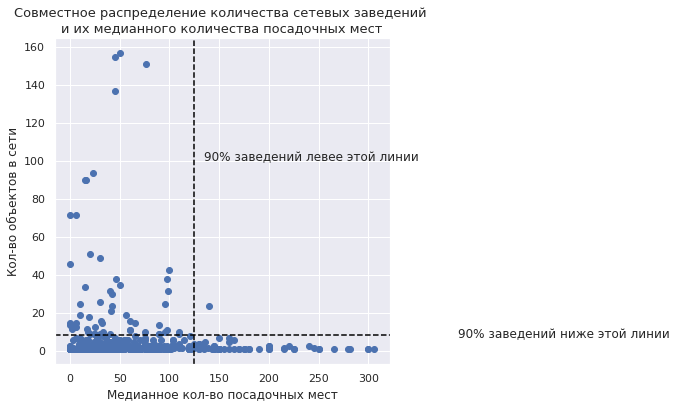

Как мы видим из графика, как правило, в сетевых заведениях - мало заведений с большим количеством посадочных мест.
В 90% сетей не больше 125 посадочных мест и 8 заведений в среднем

Проверим, отличается ли количество посадочных мест в сетевых заведениях от несетевых

Проверим нулевую гипотезу о том, что кол-во посадочных мест в сетевых и несетевых заведениях ОДИНАКОВО
Применим тест Стъюдента, несмотря на то, что наши распределения скорее всего не нормальны.
Благодаря большому количеству значений, нам позволительно использовать здесь тест Стъюдента,
так как распределение всех выборочных средних стремится к нормальному распределению.
Возьмем критический уровень значимости, равный 0.05
P-value: 0.3489196828294546
Нулевая гипотеза НЕ отвергнута. 
Разница между кол-вом посадочных мест в сетевых и несетевых объектах ОТСУТСТВУЕТ


125.0

In [101]:
chain_objects = rest[rest['chain']=="да"].groupby('object_name').agg({'object_name':'count', 'number':'median'})
chain_objects.columns = ['objects', 'median_number']
plt.figure(figsize=(6
                    
                    ,6))
plt.scatter(chain_objects['median_number'], chain_objects['objects'])
plt.xlabel('Медианное кол-во посадочных мест')
plt.ylabel('Кол-во объектов в сети')
plt.title('Совместное распределение количества сетевых заведений \nи их медианного количества посадочных мест', fontsize=13)
plt.axhline(np.percentile(chain_objects['objects'], 90), linestyle='--', color='black')
plt.axvline(np.percentile(chain_objects['median_number'], 90), linestyle='--', color='black')
plt.text(390,7, '90% заведений ниже этой линии')
plt.text(135,100, '90% заведений левее этой линии')
plt.show()
print('Как мы видим из графика, как правило, в сетевых заведениях - мало заведений с большим количеством посадочных мест.')
print('В 90% сетей не больше {} посадочных мест и {} заведений в среднем'.format(int(np.percentile(chain_objects['median_number'], 90)) , int(np.percentile(chain_objects['objects'], 90))))

print('\nПроверим, отличается ли количество посадочных мест в сетевых заведениях от несетевых')

alpha=0.05

results = stats.ttest_ind(chain_objects['median_number'], rest[rest['chain']=='нет']['number'])

print('\nПроверим нулевую гипотезу о том, что кол-во посадочных мест в сетевых и несетевых заведениях ОДИНАКОВО')
print('Применим тест Стъюдента, несмотря на то, что наши распределения скорее всего не нормальны.'
     '\nБлагодаря большому количеству значений, нам позволительно использовать здесь тест Стъюдента,'
     '\nтак как распределение всех выборочных средних стремится к нормальному распределению.')
print('Возьмем критический уровень значимости, равный', alpha)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута. \nРазница между кол-вом посадочных мест в сетевых и несетевых объектах СТАТИСТИЧЕСКИ ЗНАЧИМА')
else:
    print('Нулевая гипотеза НЕ отвергнута. \nРазница между кол-вом посадочных мест в сетевых и несетевых объектах ОТСУТСТВУЕТ')
chain_objects
np.percentile(chain_objects['median_number'], 90)

In [102]:
seats.query('object_type in ["кафе","ресторан","предприятие быстрого обслуживания","магазин (отдел кулинарии)"]')

,object_type,number,counts,ratio
7,ресторан,96.834136,2285,0.042378
5,магазин (отдел кулинарии),5.589744,273,0.020475
6,предприятие быстрого обслуживания,20.552262,1923,0.010688
3,кафе,39.716019,6099,0.006512


В ресторанах больше мест, но меньше заведений. В отделах кулинарии, кафе и предприятиях быстрого обслуживания: меньше мест, но больше точек.

In [103]:
fig = px.bar(seats.sort_values(by='number'), x='object_type', y='number', title='Среднее число посадочных мест по типам заведений')
fig.update_yaxes(title='среднее число мест')
fig.show()

Столовые и рестораны предоставляют большее число мест.

In [104]:
for col in rest.address.unique():
    if "поселение" in col:
        print(col)

город Москва, поселение Вороновское, село Вороново, дом 110
город Москва, поселение Внуковское, улица Лётчика Ульянина, дом 2
город Москва, поселение Внуковское, улица Лётчика Ульянина, дом 4
город Москва, поселение Новофедоровское, деревня Рассудово, улица Рассудовское Лесничество, дом 9А
город Москва, поселение Марушкинское, деревня Власово, Юбилейная улица, дом 148
город Москва, поселение Внуковское, деревня Ликова, дом 1А
город Москва, поселение Десеновское, Армейская улица, дом 1
город Москва, поселение Десеновское, деревня Десна, дом 144УЧ
город Москва, поселение Московский, квартал № 80, дом 11А, строение 1
город Москва, поселение Московский, деревня Говорово, дом 1Б/Н
город Москва, поселение Щаповское, деревня Троицкое, дом 38Б
город Москва, поселение Краснопахорское, село Красная Пахра, дом 2
город Москва, поселение Краснопахорское, село Красная Пахра, дом 6
город Москва, поселение Краснопахорское, село Красная Пахра, дом 9
город Москва, поселение Щаповское, деревня Овечкино, 

In [105]:
def get_street(col): 
    a = col.split(',')
    if 'поселение' in a[1]:
        return a[2].strip()
    elif 'город ' not in a[0]: # если адрес сразу начинается с улицы
        return a[0].strip()
    elif 'город ' in a[1]: # если есть "подгород"
        return a[2].strip()
    else:                   # обычные адреса, где после города сразу идет улица
        return a[1].strip()
       
   
rest['street'] = rest['address'].apply(get_street)
rest

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


Чтобы определить районы для каждой улицы, в интеренете были найдены соответствующие таблицы:


https://docs.google.com/spreadsheets/d/1o2m2rqv8oZ83oPzaIUupP2Vvl0GNmOF9PAKC9EreCXw/edit?usp=sharing

In [106]:
from io import BytesIO
import requests
spreadsheet_id = '1o2m2rqv8oZ83oPzaIUupP2Vvl0GNmOF9PAKC9EreCXw'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
district = pd.read_csv(BytesIO(r.content))
district

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,...,AdmArea_en,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,Район,Адрес,Контактный телефон,...,AdmArea_en,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000024309,Кафе «Академия»,637376349,нет,NaN,ресторан,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 662-30-10\n\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000027429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",PublicPhone:(499) 908-06-15\n\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18319,00348837,Милти,2366737142,да,Милти,магазин (отдел кулинарии),Западный административный округ,район Раменки,"Российская Федерация, город Москва, внутригоро...",PublicPhone:нет телефона\n\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18320,00349359,МИЛТИ,2366737143,да,Милти,магазин (отдел кулинарии),Центральный административный округ,Тверской район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:нет телефона\n\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18321,00349256,Burger Club,2366737161,да,Burger Club,предприятие быстрого обслуживания,Юго-Западный административный округ,район Ясенево,"город Москва, Профсоюзная улица, дом 129А",PublicPhone:(495) 987-17-00\n\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18322,00349234,Милти,2366737162,да,Милти,магазин (отдел кулинарии),Северный административный округ,Головинский район,"город Москва, Ленинградское шоссе, дом 58, стр...",PublicPhone:(495) 215-13-11\n\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
district = district[['District','Address']]
district

,District,Address
0,Район,Адрес
1,Ярославский район,"город Москва, улица Егора Абакумова, дом 9"
2,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1"
3,Таганский район,"Российская Федерация, город Москва, внутригоро..."
4,район Лианозово,"город Москва, Угличская улица, дом 17"
...,...,...
18319,район Раменки,"Российская Федерация, город Москва, внутригоро..."
18320,Тверской район,"Российская Федерация, город Москва, внутригоро..."
18321,район Ясенево,"город Москва, Профсоюзная улица, дом 129А"
18322,Головинский район,"город Москва, Ленинградское шоссе, дом 58, стр..."


In [108]:
district = district.drop_duplicates() 

In [109]:
rest_district = rest.merge(district, left_on='address', right_on='Address', how='left').drop(['Address'], axis=1)
rest_district = rest_district.drop_duplicates()
rest_district

,id,object_name,chain,object_type,address,number,street,District
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский район
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Таганский район
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,NaN
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,район Лианозово
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,район Лианозово
...,...,...,...,...,...,...,...,...
15505,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок,Таганский район
15506,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал,Басманный район
15507,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал,Басманный район
15508,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе,поселение Московский


In [110]:
rest_district[rest_district['District'].isna()].head(5)

,id,object_name,chain,object_type,address,number,street,District
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,NaN
5,27429,стол. при гоу сош № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240,Абрамцевская улица,NaN
12,28582,школа 735,нет,столовая,"город Москва, Авиамоторная улица, дом 51",140,Авиамоторная улица,NaN
13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32,улица Авиаторов,NaN
14,23670,гимназия 1542,нет,столовая,"город Москва, улица Авиаторов, дом 16",270,улица Авиаторов,NaN


In [111]:
rest_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15510 entries, 0 to 15509
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15510 non-null  int64 
 1   object_name  15510 non-null  object
 2   chain        15510 non-null  object
 3   object_type  15510 non-null  object
 4   address      15510 non-null  object
 5   number       15510 non-null  int64 
 6   street       15510 non-null  object
 7   District     12229 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.1+ MB


Для некоторых значений район не найден, где-то название улиц указано в адресе заведения некорректно и другие. Их можно исключить из анализа. Точность от этого не пострадает, ведь таких строк очень мало.

In [112]:
# число заведений по улицам
rest_district = rest_district.query('District.isna()==False')
top_streets = rest_district.groupby('street').agg({'id':'count', 'District':'max'}).reset_index().sort_values(by='id', ascending=False)
top_streets.head(10)


,street,id,District
1329,проспект Мира,175,район Свиблово
842,Пресненская набережная,167,Пресненский район
857,Профсоюзная улица,160,район Ясенево
570,Кутузовский проспект,145,район Фили-Давыдково
579,Ленинградский проспект,142,район Сокол
331,Варшавское шоссе,141,район Южное Бутово
582,Ленинский проспект,118,район Якиманка
1325,проспект Вернадского,112,район Тропарёво-Никулино
507,Кировоградская улица,106,район Чертаново Южное
1094,Ходынский бульвар,99,Хорошёвский район


In [113]:
top_streets_10 = list(top_streets.head(10)[1:11].street)
top_streets_10

['Пресненская набережная',
 'Профсоюзная улица',
 'Кутузовский проспект',
 'Ленинградский проспект',
 'Варшавское шоссе',
 'Ленинский проспект',
 'проспект Вернадского',
 'Кировоградская улица',
 'Ходынский бульвар']

In [114]:
top_streets = rest_district.groupby('street', as_index=False).agg({'object_name':'count'})
top_streets.columns = ['street', 'objects_type']
top_streets = top_streets.sort_values(by='objects_type', ascending = False)
top10_streets = top_streets.head(10)
print('Топ-10 улиц с наибольшим количеством заведений:\n', top10_streets)

Топ-10 улиц с наибольшим количеством заведений:
                       street  objects_type
1329           проспект Мира           175
842   Пресненская набережная           167
857        Профсоюзная улица           160
570     Кутузовский проспект           145
579   Ленинградский проспект           142
331         Варшавское шоссе           141
582       Ленинский проспект           118
1325    проспект Вернадского           112
507     Кировоградская улица           106
1094       Ходынский бульвар            99


In [115]:
top_streets = rest_district.groupby('street', as_index=False).agg({'object_name':'count','District':'nunique' })
top_streets.columns = ['street', 'objects_type', 'district']
top_streets = top_streets.sort_values(by='objects_type', ascending = False)
top10_streets = top_streets.head(10)
print('Топ-10 улиц с наибольшим количеством заведений:\n', top10_streets)

Топ-10 улиц с наибольшим количеством заведений:
                       street  objects_type  district
1329           проспект Мира           175         5
842   Пресненская набережная           167         1
857        Профсоюзная улица           160         6
570     Кутузовский проспект           145         3
579   Ленинградский проспект           142         4
331         Варшавское шоссе           141         9
582       Ленинский проспект           118         8
1325    проспект Вернадского           112         5
507     Кировоградская улица           106         3
1094       Ходынский бульвар            99         1


**Улицей с самым большим количеством заведений будет Проспект мира. Он пересекает город, являясь при этом очень оживленной улицей.**

Улицы с одним объектом общественного питания

In [116]:
not_top_streets = rest_district.groupby('street').agg({'id':'count', 'District':'max'}).reset_index().sort_values(by='id')
not_top_streets = not_top_streets[(not_top_streets['id']==1) & (not_top_streets['District'].isna()==False)]
not_top_streets


,street,id,District
1482,улица Екатерины Будановой,1,район Кунцево
1573,улица Маршала Голованова,1,район Марьино
941,Смоленская-Сенная площадь,1,район Хамовники
439,Есенинский бульвар,1,район Кузьминки
938,Смирновская улица,1,Нижегородский район
...,...,...,...
304,Большой Трёхсвятительский переулок,1,Басманный район
1267,корпус 864,1,район Старое Крюково
1032,Тенистый проезд,1,район Свиблово
209,Аэрофлотская улица,1,район Внуково


In [117]:
districts_1_place = not_top_streets.groupby('District')['id'].count().sort_values(ascending=False)
districts_1_place.head(10)

District
район Крюково           29
Таганский район         28
район Хамовники         24
Басманный район         23
Пресненский район       21
Тверской район          17
район Савёлки           17
район Сокольники        17
район Старое Крюково    14
Мещанский район         11
Name: id, dtype: int64

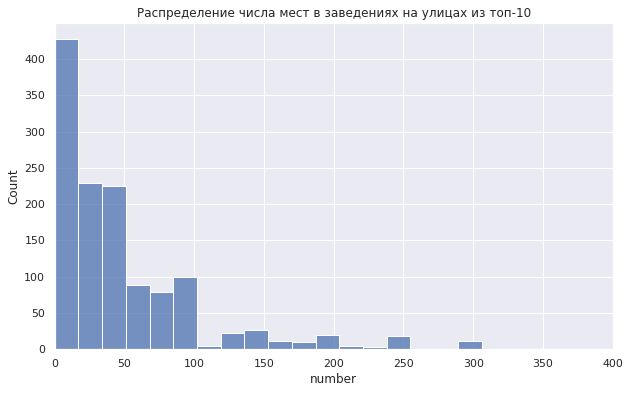

In [118]:
plt.figure(figsize=(10,6))
plt.xlim(0,400)
sns.histplot(rest.query('street in @top_streets_10').number, bins=100)
plt.title('Распределение числа мест в заведениях на улицах из топ-10')
plt.show()

In [119]:
rest.number.mean()

59.5471820903293

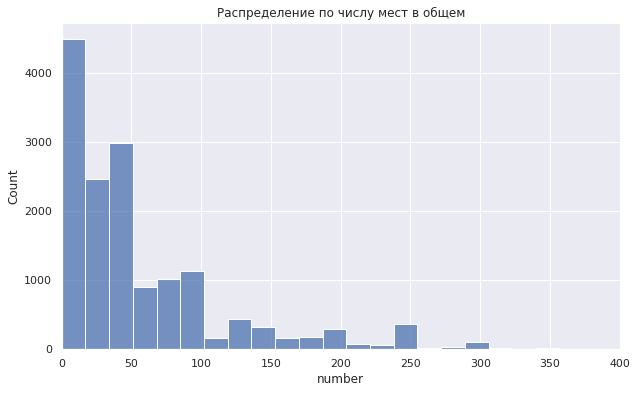

In [120]:
plt.figure(figsize=(10,6))
plt.xlim(0,400)
sns.histplot(rest.number, bins=100)
plt.title('Распределение по числу мест в общем')
plt.show()

In [121]:
top10_by_object = rest.query('street in @top_streets_10').groupby('object_type').agg({'id':'count'}).reset_index()
top10_by_object.columns = ['object_type','counts']
fig = go.Figure(go.Pie(labels=top10_by_object.object_type, values=top10_by_object.counts))
fig.show()

**Распределение по типам заведения на улицах, где большее кол-во объектов, несильно отличается от общей картины за исключением того, что в топ-10 улицах доля столовых в 2 раза меньше.**

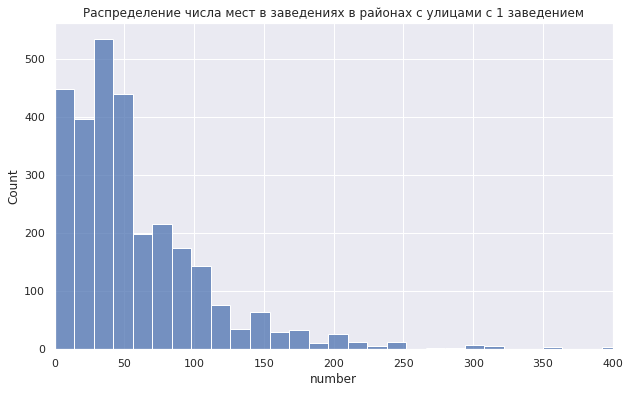

In [122]:
plt.figure(figsize=(10,6))
plt.xlim(0,400)
sns.histplot(rest_district.query('District in @districts_1_place.head(10).index').number, bins=100)
plt.title('Распределение числа мест в заведениях в районах с улицами с 1 заведением')
plt.show()

Распределение не отличается по виду от предыдущих. Распределение числа мест везде примерно одинаковое.

In [123]:
distr_1_place_by_object = rest_district.query('District in @districts_1_place.head(10).index').groupby('object_type').agg({'id':'count'}).reset_index()
distr_1_place_by_object.columns = ['object_type','counts']
fig = go.Figure(go.Pie(labels=distr_1_place_by_object.object_type, values=distr_1_place_by_object.counts))
fig.show()

Районы, где наибольшее кол-во улиц с одним заведением на 10% меньше предприятий быстрого обслуживания, на 5% больше кафе, на 4% больше баров.

**Мы выяснили, что наибольшее количество типов объектов общественного притания составляют кафе, дальше столовые столовые и рестораны.**

**При этом сетевых заведений лишь 20% от общего количества, остальные - несетевые.
Обычно для сетевых заведений характерно - мало заведений с большим количеством посадочных мест. В 90% сетей не больше 125 посадочных мест.**

Возможно, имеет смысл открывать заведение с количеством мест меньше среднего (30) в одном из районов, где больше всего улиц с одним заведением. Эти районы (район Крюково, Таганский район, район Хамовники ) находятся в пределах центра, поэтому такое местоположение должно быть достаточно доступным и удобным для большого числа людей. Так как в таких районах в среднем меньше предприятий быстрого обслуживания и отделов кулинарии, то, возможно, нужно сконцентироваться на подобной концепции заведения. Тем более, что в таких районах кафе и рестораны достаточно дорогие. Если такая концепция будет прибыльной, то можно масштабироваться в сеть. 
 Так же отметим такие здания для размещения заведений - высотки, исторические здания, топовые отели и гостиницы. Нужно подумать об иностранных туристах, которые обычно посещают центр Москвы, они захотят посетить кафе, в котором обслуживание из роботов.

## Презентация.

https://disk.yandex.ru/i/7bdBp_Dah2jivQ